# НАША ЗАДАЧА

**Анализ удовлетворенности клиентов климатическим оборудованием**


---


**Цель проекта:**
Провести комплексный анализ данных о комфорте использования климатического оборудования в офисах различных стран и городов. На основе полученных результатов определить, в какой тип оборудования (кондиционирование, вентиляция, смешанный тип) стоит инвестировать больше ресурсов для повышения удовлетворенности клиентов в зависимости от региона. Также выявить ключевые факторы, влияющие на комфорт пользователей, и дать рекомендации по развитию бизнеса в разных регионах.

---

**Ключевые вопросы для анализа**
- Какие типы климатического оборудования наиболее востребованы в разных регионах?
- Как возраст, пол и климатические условия влияют на предпочтения пользователей?
- Какие факторы сильнее всего влияют на оценку комфорта?
- Где наблюдаются наибольшие проблемы с комфортом (страны, типы оборудования)?
- Какие рекомендации можно дать для улучшения продукции и сервиса в разных регионах?

---

**Используемые данные**
Данные содержат информацию о климатических условиях, типах охлаждения/обогрева, демографических характеристиках респондентов и их субъективных оценках комфорта. Полный список переменных приведен в описании проекта.

---

**Ожидаемый результат**
- Отчет с анализом данных, проверкой гипотез и выводами.
- Дашборд для визуализации ключевых метрик.
- Презентация с рекомендациями для руководства.


# IMPORTS

In [2535]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
import re

import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

# Настройка ноутбука

In [2536]:

pd.set_option('display.max_rows', None)  # Показать все строки
pd.set_option('display.max_columns', None)  # Показать все столбцы
pd.set_option('display.width', None)  # Автоматически подбирать ширину
pd.set_option('display.max_colwidth', None)  # Показать полное содержимое ячеек

# FILE

In [2537]:
FILEPATH = "data.csv"

# DATA FRAME

# Базовая подготовка датасета к проведению рассчетов

In [2538]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]



In [2539]:
df = pd.read_csv(
    'data.csv',
    sep=';',
    decimal='.',
    header=0,
    names=column_names
)

# Описание нашего DF

ВСЕ ДАННЫЕ О DF

In [2540]:
df.dtypes

year                                   float64
season                                  object
climate                                 object
city                                    object
country                                 object
cooling_method                          object
mixed_cooling_mode                      object
heating_method                          object
age                                    float64
gender                                  object
temperature_feeling                    float64
temperature_feeling_bool               float64
preferred_temperature_change            object
air_movement_feeling_bool              float64
preferred_air_movement_change           object
comfort_rating                         float64
clothing_insulation                    float64
indoor_air_temperature                 float64
outdoor_air_temperature                float64
relative_humidity                      float64
air_speed                              float64
height       

Есть данные, неправильного типа(year,age и тд). В дальнейшем нужно будет привести к правильному типу данных.

In [2541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 484 non-null    float64
 1   season                               484 non-null    object 
 2   climate                              484 non-null    object 
 3   city                                 484 non-null    object 
 4   country                              484 non-null    object 
 5   cooling_method                       484 non-null    object 
 6   mixed_cooling_mode                   337 non-null    object 
 7   heating_method                       222 non-null    object 
 8   age                                  413 non-null    float64
 9   gender                               412 non-null    object 
 10  temperature_feeling                  484 non-null    float64
 11  temperature_feeling_bool        

Столбцы с пропусками:

mixed_cooling_mode: 337 непустых значений (пропуски ~30%). Возможно, связано с тем, что данные заполняются только для смешанного типа охлаждения.

heating_method: 222 непустых значения (пропуски ~54%). Может отсутствовать, когда исследование проводилось в жаркий сезон.

age: 413 непустых значений (пропуски ~15%).

gender: 412 непустых значений (пропуски ~15%).

air_movement_feeling_bool: 198 непустых значений (пропуски ~59%). Возможно, заполнялось только для определенных условий.

comfort_rating: 215 непустых значений (пропуски ~56%). Критично для анализа удовлетворенности.

outdoor_air_temperature: 72 непустых значения (пропуски ~85%). Возможно, измерялась не во всех случаях.

Размеры нашего DF

Смотрим сразу на размеры нашего DF. Впоследствии посмотрим на размеры нашего DF после обработки

In [2542]:
df.shape

(484, 30)

In [2543]:
df.describe()

,year,age,temperature_feeling,temperature_feeling_bool,air_movement_feeling_bool,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
count,484.000000,413.000000,484.000000,484.000000,198.000000,215.000000,484.000000,484.000000,72.000000,484.000000,484.000000,143.000000,214.000000,72.000000,146.000000,279.000000,157.000000,79.00000,484.000000,484.000000
mean,2011.033058,40.634383,0.203306,0.789256,0.752525,4.772093,0.634587,26.072107,24.104167,52.973760,0.760558,164.411678,65.471963,0.513889,0.527397,0.247312,0.184713,0.78481,27.389669,0.105372
std,0.922988,11.001301,1.091976,0.408259,0.432639,1.261161,0.253103,7.681363,0.604546,13.036204,4.921106,21.273235,11.574079,0.503315,0.500967,0.432225,0.389307,0.41358,19.469562,0.440276
min,2010.000000,22.000000,-3.000000,0.000000,0.000000,1.000000,0.360000,16.200000,22.800000,23.800000,0.000000,5.230000,42.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.500000,0.000000
25%,2010.000000,35.000000,0.000000,1.000000,1.000000,4.000000,0.460000,23.800000,23.800000,42.775000,0.060000,160.000000,57.000000,0.000000,0.000000,0.000000,0.000000,1.00000,22.000000,0.000000
50%,2011.000000,42.000000,0.000000,1.000000,1.000000,5.000000,0.590000,24.600000,24.100000,53.750000,0.100000,165.100000,65.000000,1.000000,1.000000,0.000000,0.000000,1.00000,22.000000,0.000000
75%,2012.000000,45.000000,1.000000,1.000000,1.000000,6.000000,0.700000,25.900000,24.400000,62.325000,0.140000,172.700000,72.750000,1.000000,1.000000,0.000000,0.000000,1.00000,30.800000,0.000000
max,2012.000000,65.000000,3.000000,1.000000,1.000000,6.000000,2.080000,77.000000,25.900000,85.100000,63.830000,190.500000,110.000000,1.000000,1.000000,1.000000,1.000000,1.00000,328.000000,3.000000


Проблемы в данных
Аномалии:

indoor_air_temperature: 77°C (невозможно в жилом помещении).

air_speed: 63.83 м/с (ураганная скорость — ошибка датчика).

height: 5 см (очевидная ошибка ввода).

average_monthly_outdoor_temperature: 91°C (нереально для земных условий).

Пропуски:

Столбцы age, height, weight содержат много пропусков (особенно height — только 143 значения).

Смещение в оценках комфорта:

Большинство респондентов ставят высокие оценки (comfort_rating), что может указывать на:

Предвзятость выборки (например, опрашивали только довольных людей).

Некорректную шкалу (слишком узкий диапазон "позитивных" вариантов).

# Исследование данных на качество и предобработка




Исследование данных на качество и предобработка
Для проведения исследования необходимо:
- Названия столбцов привести в соответствии с PEP8
- Исследовать типы данных, привести данные к правильному типу, где это необходимо
- Проверить данные на пропуски и заполнить их при необходимости. Обосновать решение.
- Проверить данные на явные и неявные (в категориальных столбцах) дубликаты. Обработать дубликаты.
- Провести аналитический и графический анализ данных. Сделать выводы.
- Проверить данные на выбросы и адекватность данных. Предположить причину возникновения выбросов и обработать такие значения.





## Названия столбцов привести в соответствии с PEP8

Названия столбцов привели в соответствии с PEP8

In [2544]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

Провека, что все прошло успешно

In [2545]:
df.columns

Index(['year', 'season', 'climate', 'city', 'country', 'cooling_method',
       'mixed_cooling_mode', 'heating_method', 'age', 'gender',
       'temperature_feeling', 'temperature_feeling_bool',
       'preferred_temperature_change', 'air_movement_feeling_bool',
       'preferred_air_movement_change', 'comfort_rating',
       'clothing_insulation', 'indoor_air_temperature',
       'outdoor_air_temperature', 'relative_humidity', 'air_speed', 'height',
       'weight', 'curtains', 'fan_mode', 'window_status', 'door_status',
       'heating_mode', 'average_monthly_outdoor_temperature',
       'number_of_complaints'],
      dtype='object')

## Исследовать типы данных, привести данные к правильному типу, где это необходимо

In [2546]:
def convert_data_types(df):
    """
    Преобразует типы данных в DataFrame в более подходящие и удобные для анализа.
    Функция выполняет следующие преобразования:
    - Категориальные колонки -> тип 'category'
    - Булевы колонки -> тип 'bool'
    - Числовые колонки:
      * Целочисленные -> тип 'Int64' (споддержкой NA)
      * Вещественные -> тип 'float'
    
    """
    
    # Категориальные колонки
    categorical_cols = [
        'season', 'climate', 'city', 'country', 'cooling_method',
        'mixed_cooling_mode', 'heating_method', 'gender',
        'preferred_temperature_change', 'preferred_air_movement_change'
    ]
    
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # Булевы колонки
    bool_cols = [
        'temperature_feeling_bool', 'air_movement_feeling_bool',
        'curtains', 'fan_mode', 'window_status', 'door_status', 'heating_mode'
    ]
    
    for col in bool_cols:
        if col in df.columns:
            df[col] = df[col].astype('bool')
    
    # Числовые колонки
    numeric_cols = [
        'year', 'age', 'temperature_feeling', 'comfort_rating',
        'clothing_insulation', 'indoor_air_temperature', 'outdoor_air_temperature',
        'relative_humidity', 'air_speed', 'height', 'weight',
        'average_monthly_outdoor_temperature', 'number_of_complaints'
    ]
    
    int_cols = ['year', 'age', 'clothing_insulation', 'number_of_complaints', 
                'height', 'weight', 'comfort_rating']
    
    for col in numeric_cols:
        if col in df.columns:
            if col in int_cols:
                df[col] = pd.to_numeric(df[col], errors='coerce').round(0).astype('Int64')
            else:
                df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
    
    return df
df = convert_data_types(df)

Проверка, что все прошло успешно

In [2547]:
df.dtypes

year                                      Int64
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       Int64
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool                   bool
preferred_temperature_change           category
air_movement_feeling_bool                  bool
preferred_air_movement_change          category
comfort_rating                            Int64
clothing_insulation                       Int64
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       float64
air_speed                               

In [2548]:
def convert_boolean_columns(df):
    """
    Преобразует булевы столбцы (0/1) в понятные текстовые метки:
    - 0 → "Выключено/Закрыто"
    - 1 → "Включено/Открыто"
    Пропуски заменяет на "Неизвестно".
    """
    boolean_columns = [
        'curtains',   
        'fan_mode',     
        'window_status',  
        'door_status',   
        'heating_mode'    
    ]

    
    label_mapping = {
        0: "Выключено/Закрыто",
        1: "Включено/Открыто"
    }

    
    for col in boolean_columns:
        if col in df.columns:
            df[col] = df[col].map(label_mapping).fillna("Неизвестно")
            

    return df


df = convert_boolean_columns(df)

Проверяем,что все прошло успешно

In [2549]:
df.head(5)

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,temperature_feeling,temperature_feeling_bool,preferred_temperature_change,air_movement_feeling_bool,preferred_air_movement_change,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22,NaN,0.0,True,Без изменений,True,Без изменений,4,1,22.9,22.8,48.9,0.26,<NA>,<NA>,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,28.9,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40,NaN,-2.0,True,Без изменений,True,Без изменений,6,1,74.8,23.7,39.2,0.12,<NA>,<NA>,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,84.0,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42,NaN,1.0,True,Без изменений,True,Без изменений,5,1,25.6,24.5,34.7,0.08,<NA>,<NA>,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,32.8,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27,NaN,-0.5,False,Теплее,True,Без изменений,2,1,24.2,23.8,50.0,27.16,<NA>,<NA>,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,28.9,1
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46,NaN,0.0,True,Без изменений,True,Меньше,4,1,23.8,24.1,35.8,63.83,<NA>,<NA>,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,32.8,0


## Проверить данные на выбросы и адекватность данных. Предположить причину возникновения выбросов и обработать такие значения.


### Поиск и удаление точных дубликатов

In [2550]:
# Поиск полных дубликатов
duplicates = df[df.duplicated()]
print("Найденные дубликаты:")
print(duplicates)

# Удаление дубликатов
df_normal = df.drop_duplicates()

Найденные дубликаты:
     year season                climate        city country cooling_method  \
482  2012   Зима  Жаркий полузасушливый  Хайдарабад   Индия      Смешанный   
483  2012   Зима  Жаркий полузасушливый  Хайдарабад   Индия      Смешанный   

    mixed_cooling_mode heating_method   age   gender  temperature_feeling  \
482  Кондиционирование            NaN  <NA>  Женский                 -1.0   
483  Кондиционирование            NaN  <NA>  Женский                 -1.0   

     temperature_feeling_bool preferred_temperature_change  \
482                      True                     Холоднее   
483                      True                     Холоднее   

     air_movement_feeling_bool preferred_air_movement_change  comfort_rating  \
482                       True                        Больше            <NA>   
483                       True                        Больше            <NA>   

     clothing_insulation  indoor_air_temperature  outdoor_air_temperature  \
482    

### Не числовые колонки

#### Колонка preferred_temperature_change

In [2551]:
df["preferred_temperature_change"].unique()

['Без изменений', 'Теплее', 'Холоднее', 'Холодн', 'Тепле']
Categories (5, object): ['Без изменений', 'Тепле', 'Теплее', 'Холодн', 'Холоднее']

In [2552]:
# Исправляем опечатки в значениях
df['preferred_temperature_change'] = df['preferred_temperature_change'].replace({
    'Холодн': 'Холоднее',
    'Тепле': 'Теплее'
})


print(df['preferred_temperature_change'].unique())

['Без изменений', 'Теплее', 'Холоднее']
Categories (3, object): ['Без изменений', 'Теплее', 'Холоднее']


In [2553]:
df["preferred_temperature_change"].unique()

['Без изменений', 'Теплее', 'Холоднее']
Categories (3, object): ['Без изменений', 'Теплее', 'Холоднее']

#### Колонка "Climate"

Проверяем, что лежит в этой колонке

In [2554]:
df["climate"].unique()

['Cубтропический океанический', 'Cубтроп океанич', 'Субтропическое высокогорье', 'Жаркий полузасушливый', 'Тропическая влажная саванна', 'Влажный субтропический муссонный']
Categories (6, object): ['Cубтроп океанич', 'Cубтропический океанический', 'Влажный субтропический муссонный', 'Жаркий полузасушливый', 'Субтропическое высокогорье', 'Тропическая влажная саванна']

Увидели ошибку в написании-исправляем

In [2555]:
df["climate"] = df["climate"].replace({
    "Cубтроп океанич" : 'Cубтропический океанический'
})

In [2556]:
df["climate"].unique()

['Cубтропический океанический', 'Субтропическое высокогорье', 'Жаркий полузасушливый', 'Тропическая влажная саванна', 'Влажный субтропический муссонный']
Categories (5, object): ['Cубтропический океанический', 'Влажный субтропический муссонный', 'Жаркий полузасушливый', 'Субтропическое высокогорье', 'Тропическая влажная саванна']

### Числовые колонки

#### Колонка "indoor_air_temperature" и "average_monthly_outdoor_temperature" и "outdoor_air_temperature"

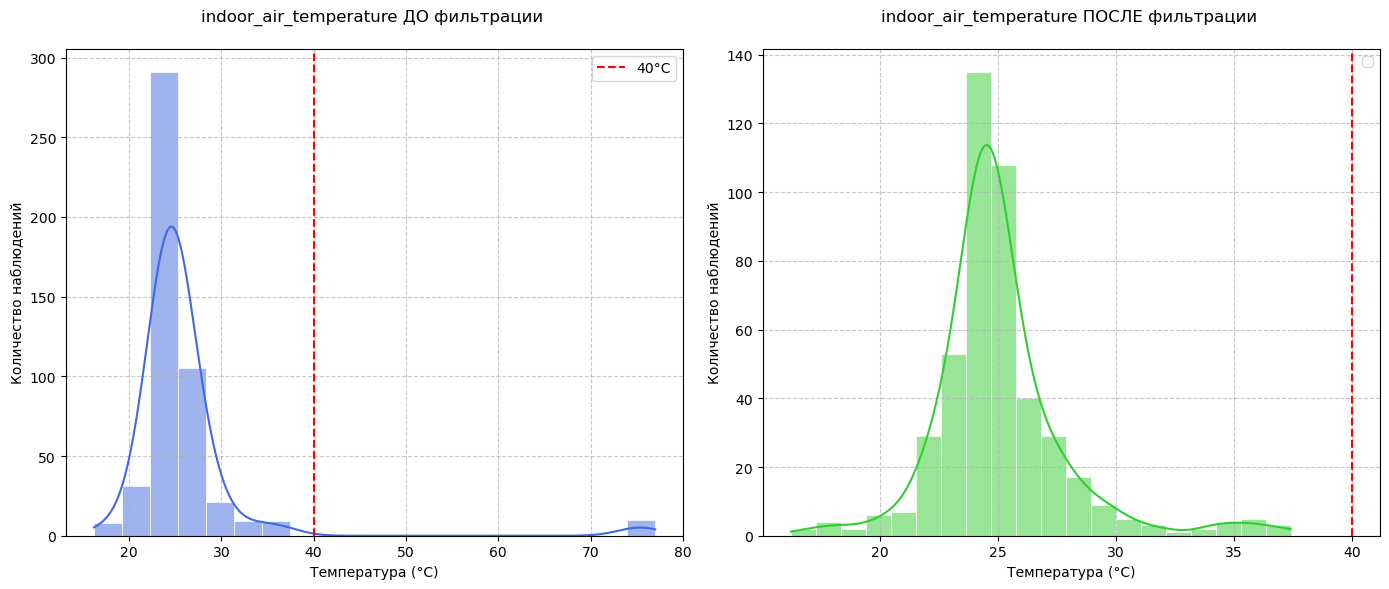


Анализ indoor_air_temperature:
Не-NaN значений до фильтрации: 484
Не-NaN значений после фильтрации: 464
Удалено значений >40°C: 20


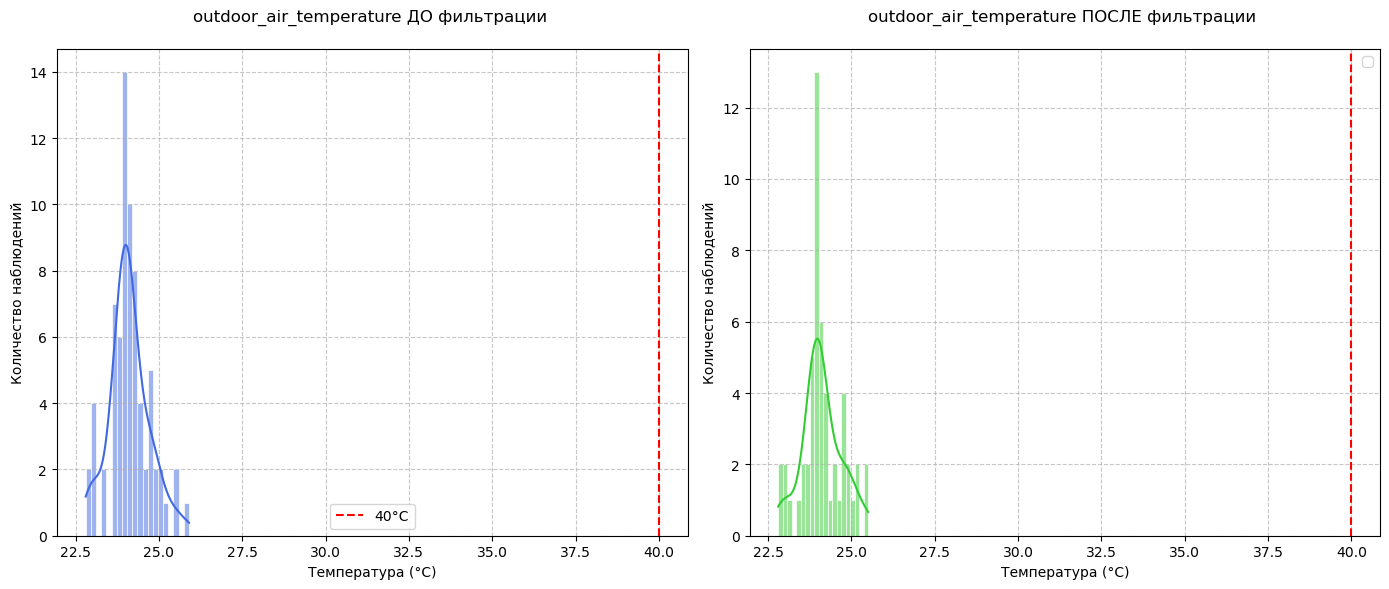


Анализ outdoor_air_temperature:
Не-NaN значений до фильтрации: 72
Не-NaN значений после фильтрации: 53
Удалено значений >40°C: 19


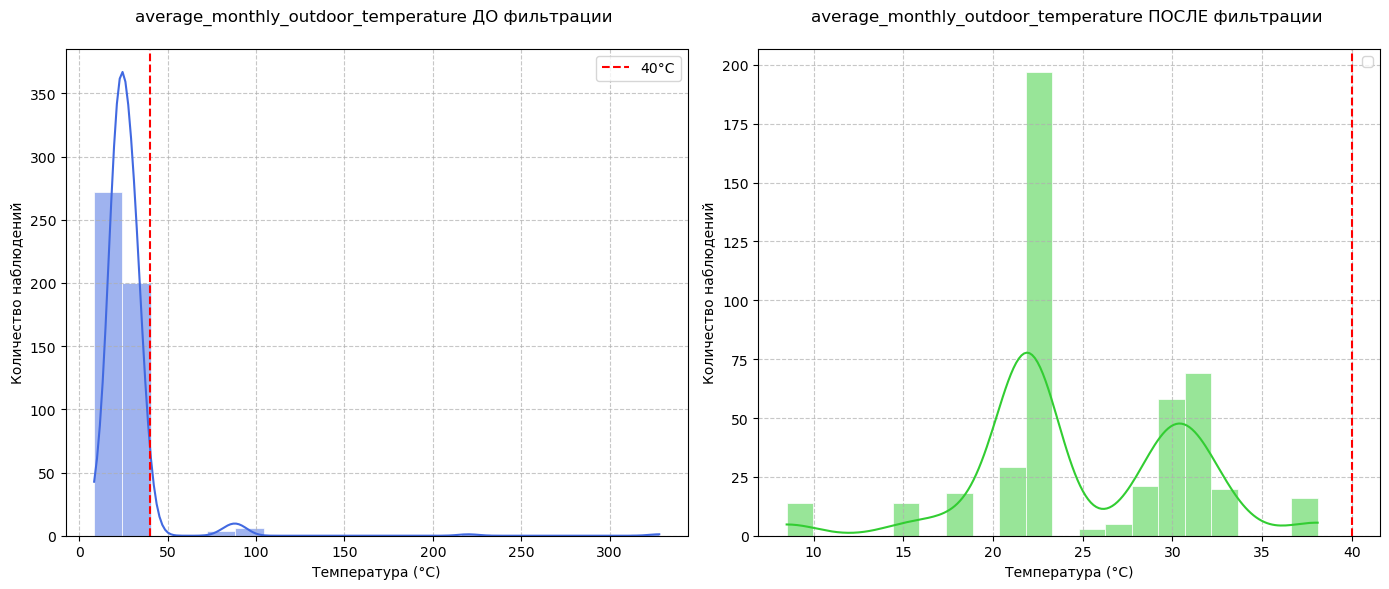


Анализ average_monthly_outdoor_temperature:
Не-NaN значений до фильтрации: 484
Не-NaN значений после фильтрации: 464
Удалено значений >40°C: 20


In [2557]:
def plot_temperature_distribution(df_before, df_after, column_name, title_suffix=""):
    """
    Функция для построения сравнения распределений температур до и после фильтрации
    
    Параметры:
    df_before - DataFrame до фильтрации
    df_after - DataFrame после фильтрации
    column_name - название колонки с температурой
    title_suffix - дополнительный текст в заголовке
    """
    plt.figure(figsize=(14, 6))
    
    # График до фильтрации
    plt.subplot(1, 2, 1)
    sns.histplot(df_before[column_name].dropna(), 
                bins=20, 
                kde=True, 
                color='royalblue',
                edgecolor='white',
                linewidth=0.5)
    plt.title(f'{column_name} ДО фильтрации {title_suffix}', fontsize=12, pad=20)
    plt.xlabel('Температура (°C)', fontsize=10)
    plt.ylabel('Количество наблюдений', fontsize=10)
    plt.axvline(40, color='red', linestyle='--', linewidth=1.5, label='40°C')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # График после фильтрации
    plt.subplot(1, 2, 2)
    sns.histplot(df_after[column_name].dropna(), 
                bins=20, 
                kde=True, 
                color='limegreen',
                edgecolor='white',
                linewidth=0.5)
    plt.title(f'{column_name} ПОСЛЕ фильтрации {title_suffix}', fontsize=12, pad=20)
    plt.xlabel('Температура (°C)', fontsize=10)
    plt.ylabel('Количество наблюдений', fontsize=10)
    plt.axvline(40, color='red', linestyle='--', linewidth=1.5)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Пример использования в вашей функции:
def analyze_and_clean_temperature_data(df, 
                                     indoor_column='indoor_air_temperature',
                                     monthly_outdoor_column='average_monthly_outdoor_temperature',
                                     outdoor_column='outdoor_air_temperature'):
    """
    Анализирует температурные данные с улучшенной визуализацией
    """
    df_clean = df.copy()
    
    # Фильтрация значений
    mask = (
        df_clean[indoor_column].isna() | (df_clean[indoor_column] <= 40)) & (
        df_clean[outdoor_column].isna() | (df_clean[outdoor_column] <= 40)) & (
        df_clean[monthly_outdoor_column].isna() | (df_clean[monthly_outdoor_column] <= 40)
    )
    df_final = df_clean[mask].copy()
    
    # Визуализация для каждой колонки
    for col in [indoor_column, outdoor_column, monthly_outdoor_column]:
        plot_temperature_distribution(df_clean, df_final, col)
        
        # Статистика
        initial_non_na = df_clean[col].notna().sum()
        final_non_na = df_final[col].notna().sum()
        
        print(f"\nАнализ {col}:")
        print(f"Не-NaN значений до фильтрации: {initial_non_na}")
        print(f"Не-NaN значений после фильтрации: {final_non_na}")
        print(f"Удалено значений >40°C: {initial_non_na - final_non_na}")
    
    return df_final
df_cleaned = analyze_and_clean_temperature_data(df)

In [2558]:
# def analyze_and_clean_temperature_data(df, 
#                                      indoor_column='indoor_air_temperature',
#                                      monthly_outdoor_column='average_monthly_outdoor_temperature',
#                                      outdoor_column='outdoor_air_temperature'):
#     """
#     Анализирует температурные данные с визуализацией до/после фильтрации (>40°C).
#     Возвращает DataFrame с ограничением температуры <= 40°C.
#     Учитывает пропуски в данных при подсчете статистики.
    
#     Параметры:
#     df - исходный DataFrame
#     indoor_column - колонка с температурой в помещении
#     outdoor_column - колонка с уличной температурой
#     monthly_outdoor_column - колонка с месячной уличной температурой
    
#     Возвращает:
#     Очищенный DataFrame
#     """
#     df_clean = df.copy()
    
#     print(f"\n{'='*50}")
#     print("АНАЛИЗ ТЕМПЕРАТУРНЫХ ДАННЫХ")
#     print(f"{'='*50}")

#     # Создаем маску для фильтрации, учитывая только не-NaN значения
#     mask = (
#         df_clean[indoor_column].isna() | (df_clean[indoor_column] <= 40)) & (
#         df_clean[outdoor_column].isna() | (df_clean[outdoor_column] <= 40)) & (
#         df_clean[monthly_outdoor_column].isna() | (df_clean[monthly_outdoor_column] <= 40)
#     )
#     df_final = df_clean[mask].copy()

#     # Визуализация для каждой колонки
#     for col in [indoor_column, outdoor_column, monthly_outdoor_column]:
#         plt.figure(figsize=(14, 6))
        
#         # График до фильтрации
#         plt.subplot(1, 2, 1)
#         sns.histplot(df_clean[col].dropna(), bins=30, kde=True, color='royalblue')
#         plt.title(f'{col} ДО фильтрации')
#         plt.xlabel('Температура (°C)')
#         plt.axvline(40, color='red', linestyle='--', label='Граница 40°C')
#         plt.legend()
        
#         # График после фильтрации
#         plt.subplot(1, 2, 2)
#         sns.histplot(df_final[col].dropna(), bins=30, kde=True, color='limegreen')
#         plt.title(f'{col} ПОСЛЕ фильтрации')
#         plt.xlabel('Температура (°C)')
#         plt.axvline(40, color='red', linestyle='--')
#         plt.legend()
        
#         plt.tight_layout()
#         plt.show()

#         # Статистика с учетом пропусков
#         initial_non_na = df_clean[col].notna().sum()
#         final_non_na = df_final[col].notna().sum()
#         removed_high = initial_non_na - final_non_na
        
#         print(f"\nАнализ {col}:")
#         print(f"Всего значений (включая пропуски): {len(df_clean)}")
#         print(f"Не-NaN значений до фильтрации: {initial_non_na}")
#         print(f"Не-NaN значений после фильтрации: {final_non_na}")
#         print(f"Удалено значений >40°C: {removed_high}")
#         print(f"Пропусков в исходных данных: {df_clean[col].isna().sum()}")

#     print(f"\n{'='*50}")
#     print(f"Исходный размер датасета: {len(df)} строк")
#     print(f"Итоговый размер датасета: {len(df_final)} строк")
#     print(f"Всего удалено строк: {len(df) - len(df_final)}")
#     print(f"Из них из-за значений >40°C: {len(df_clean) - len(df_final)}")
    
#     return df_final

# # Пример вызова функции
# df_cleaned = analyze_and_clean_temperature_data(df)

Удалили выбросы, которые не могли существовать. Данные стали более однородными, что улучшит анализ. 

#### Колонка "air_speed"

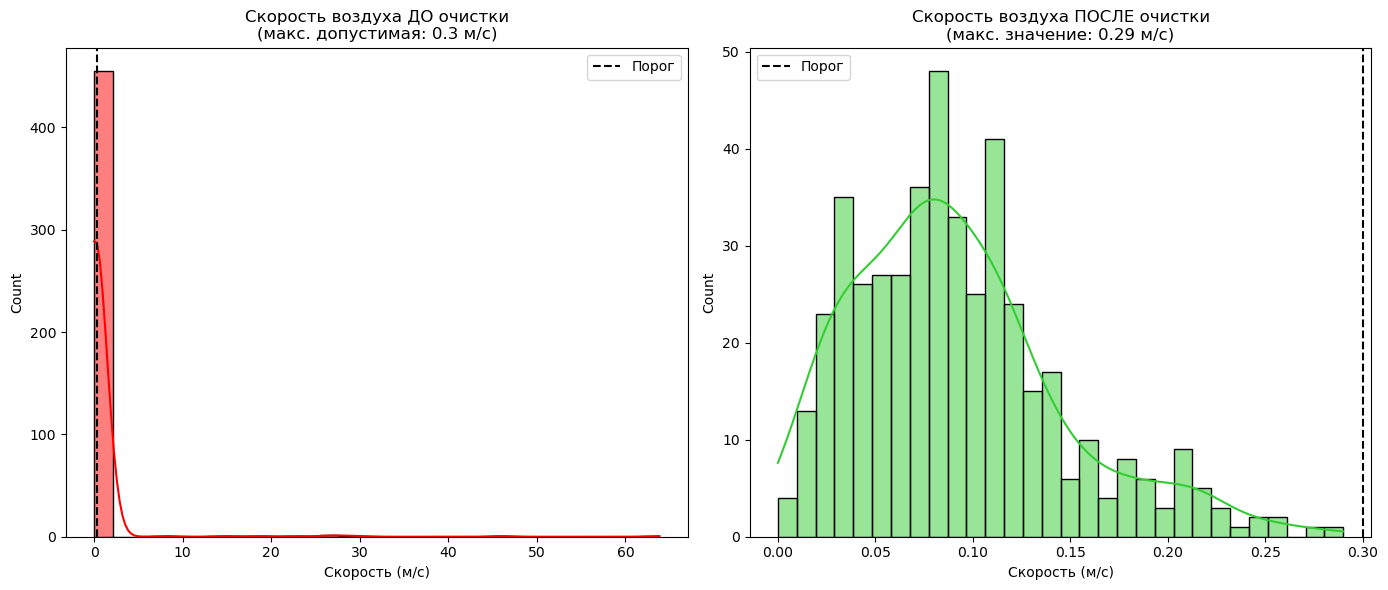


ОБРАБОТКА СКОРОСТИ ВОЗДУХА В ПОМЕЩЕНИИ (макс. 0.3 м/с)

Статистика ДО очистки:
count    464.000000
mean       0.683039
std        4.519847
min        0.000000
25%        0.060000
50%        0.090000
75%        0.140000
max       63.830000
Name: air_speed, dtype: float64

Статистика ПОСЛЕ очистки:
count    455.000000
mean       0.090527
std        0.054349
min        0.000000
25%        0.050000
50%        0.080000
75%        0.120000
max        0.290000
Name: air_speed, dtype: float64

Исправлено значений (0.3–5 м/с → 0.03–0.5): 39
Удалено значений (>5 м/с): -30
Итоговый размер датасета: 455


In [2559]:
def clean_indoor_air_speed(df_cleaned, column='air_speed', max_valid_speed=0.3):
    """
    Очищает данные о скорости воздуха В ПОМЕЩЕНИИ:
    - 0.3–5 м/с → делим на 10 (ошибка ввода: 3.5 → 0.35)
    - >5 м/с → удаляем
    - Строит графики и выводит статистику.
    Мы предпологаем, что данный параметр-скорость воздуха в помещении и те, значения, которые находстся вне диапозона-ошибка или неккоректный ввод.
    Параметры:
    max_valid_speed - максимально допустимая скорость (по умолчанию 0.3 м/с,по информации из интернета)
    """
    df_final = df_cleaned.copy()
    before = df_final[column].copy()
    
    # 1. Корректируем 0.3–5 м/с (делим на 10)
    mask_03_5 = (df_final[column] > max_valid_speed) & (df_final[column] <= 5)
    df_final.loc[mask_03_5, column] = df_final.loc[mask_03_5, column] / 10
    
    # 2. Удаляем >5 м/с
    df_final = df_final[df_final[column] <= 5]
    after = df_final[column]
    
    # Визуализация
    plt.figure(figsize=(14, 6))
    
    # График до очистки
    plt.subplot(1, 2, 1)
    sns.histplot(before.dropna(), kde=True, color='red', bins=30)
    plt.title(f'Скорость воздуха ДО очистки\n(макс. допустимая: {max_valid_speed} м/с)', fontsize=12)
    plt.xlabel('Скорость (м/с)')
    plt.axvline(max_valid_speed, color='black', linestyle='--', label='Порог')
    plt.legend()
    
    # График после очистки
    plt.subplot(1, 2, 2)
    sns.histplot(after.dropna(), kde=True, color='limegreen', bins=30)
    plt.title(f'Скорость воздуха ПОСЛЕ очистки\n(макс. значение: {after.max():.2f} м/с)', fontsize=12)
    plt.xlabel('Скорость (м/с)')
    plt.axvline(max_valid_speed, color='black', linestyle='--', label='Порог')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f"\n{'='*50}")
    print(f"ОБРАБОТКА СКОРОСТИ ВОЗДУХА В ПОМЕЩЕНИИ (макс. {max_valid_speed} м/с)")
    print(f"{'='*50}")
    
    print("\nСтатистика ДО очистки:")
    print(before.describe())
    
    print("\nСтатистика ПОСЛЕ очистки:")
    print(after.describe())
    
    print(f"\nИсправлено значений (0.3–5 м/с → 0.03–0.5): {mask_03_5.sum()}")
    print(f"Удалено значений (>5 м/с): {len(before) - len(after) - mask_03_5.sum()}")
    print(f"Итоговый размер датасета: {len(df_final)}")
    
    return df_final


df_final = clean_indoor_air_speed(df_cleaned, max_valid_speed=0.3)

#### Колонка "height"

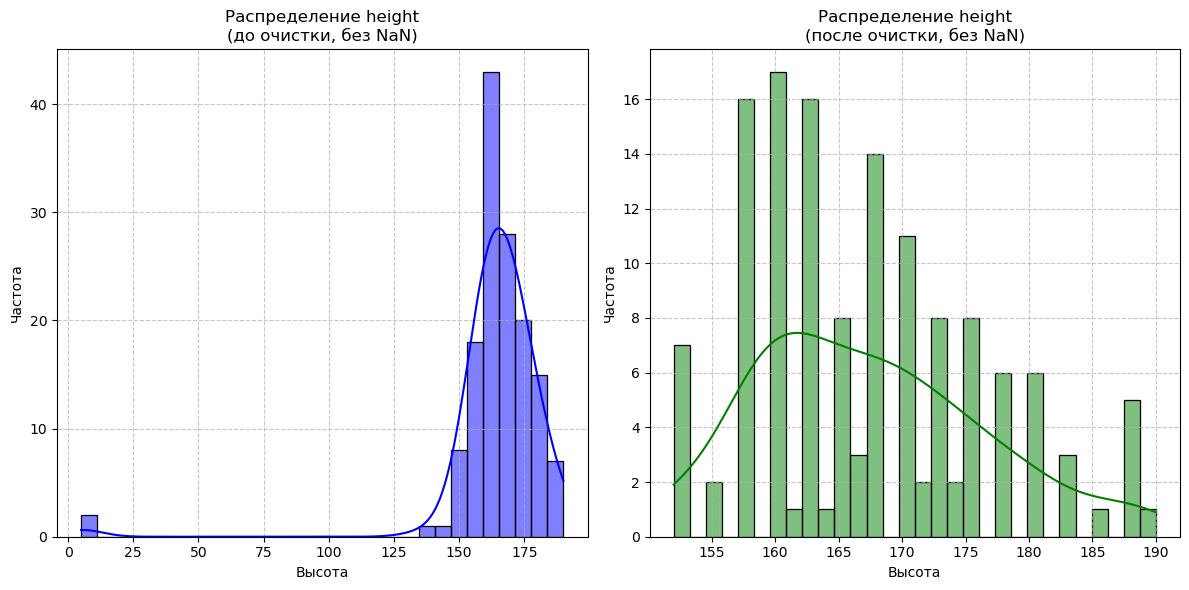


Анализ для height:
Статистика до очистки (включая NaN):
count         143.0
mean     164.503497
std       21.251967
min             5.0
25%           160.0
50%           165.0
75%           173.0
max           190.0
Name: height, dtype: Float64

Количество NaN: 312

Статистика после очистки (включая NaN):
count         138.0
mean     167.289855
std        8.936273
min           152.0
25%           160.0
50%           167.0
75%           173.0
max           190.0
Name: height, dtype: Float64

Количество NaN: 312

Удалено строк (где height < 100): 5

Итоговый размер датасета: 450
Всего удалено строк (height < 150): 5


In [2560]:
def analyze_and_clean_height_data(df_final, height_column='height'):
    """
    Анализирует и очищает данные о высоте, строит сравнительные графики.
    Удаляет строки, где height < 100 (но сохраняет NaN).
    
    Параметры:
    df_final - входной DataFrame (очищенный после предыдущих шагов)
    height_column - название колонки с высотой (по умолчанию 'height')
    """
    
    # Создаем копию DataFrame для работы
    df_clean = df_final.copy()
    
    # Получаем данные до очистки (включая NaN)
    height_before = df_clean[height_column]
    
    # Фильтруем данные: оставляем либо NaN, либо height >= 150
    mask = (df_clean[height_column] >= 150) | (df_clean[height_column].isna())
    df_final_cleaned = df_clean[mask].copy()
    height_after = df_final_cleaned[height_column]
    
    # Строим графики
    plt.figure(figsize=(12, 6))
    
    # График до очистки (исключая NaN для визуализации)
    plt.subplot(1, 2, 1)
    sns.histplot(height_before.dropna(), kde=True, color='blue', bins=30)
    plt.title(f'Распределение {height_column}\n(до очистки, без NaN)')
    plt.xlabel('Высота')
    plt.ylabel('Частота')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # График после очистки (исключая NaN для визуализации)
    plt.subplot(1, 2, 2)
    sns.histplot(height_after.dropna(), kde=True, color='green', bins=30)
    plt.title(f'Распределение {height_column}\n(после очистки, без NaN)')
    plt.xlabel('Высота')
    plt.ylabel('Частота')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Вывод статистики (с учетом NaN)
    print(f"\n{'='*50}")
    print(f"Анализ для {height_column}:")
    print("Статистика до очистки (включая NaN):")
    print(height_before.describe())
    print(f"\nКоличество NaN: {height_before.isna().sum()}")
    
    print("\nСтатистика после очистки (включая NaN):")
    print(height_after.describe())
    print(f"\nКоличество NaN: {height_after.isna().sum()}")
    
    print(f"\nУдалено строк (где height < 100): {len(df_clean) - len(df_final_cleaned)}")
    
    print(f"\n{'='*50}")
    print(f"Итоговый размер датасета: {len(df_final_cleaned)}")
    print(f"Всего удалено строк (height < 150): {len(df_clean) - len(df_final_cleaned)}")
    
    return df_final_cleaned

# Пример вызова:
df_final_cleaned = analyze_and_clean_height_data(df_final)

Значение веса в 110 кг оставляем, тк такое значение допустимо и реально может быть.

Удаляем недопустимые значение роста, которые не могут быть(>100)

# Проверить данные на пропуски и заполнить их при необходимости. Обосновать решение.

Проверяем наш DF на попуски

In [2561]:
print("\nПропущенные значения:")
print(df_normal.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                     147
heating_method                         260
age                                     69
gender                                  72
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                         267
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                410
relative_humidity                        0
air_speed                                0
height                                 339
weight                         

## Добавляем новые категории

In [2562]:
# Добавляем новую категорию
df_normal["mixed_cooling_mode"] = df_normal["mixed_cooling_mode"].cat.add_categories("not applicable")

# Теперь можно заполнить NA
df_normal["mixed_cooling_mode"] = df_normal["mixed_cooling_mode"].fillna("not applicable")

In [2563]:

if "No mechanical heating" not in df_normal["heating_method"].cat.categories:
    df_normal["heating_method"] = df_normal["heating_method"].cat.add_categories("No mechanical heating")

df_normal["heating_method"] = df_normal["heating_method"].fillna("No mechanical heating")



In [2564]:
# Gender 
if "Unknown" not in df_normal["gender"].cat.categories:
    df_normal["gender"] = df_normal["gender"].cat.add_categories("Unknown")
df_normal["gender"].fillna("Unknown", inplace=True)

Проверка, какие проупски еще остались необработанные

In [2565]:
print("\nПропущенные значения:")
print(df_normal.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                     69
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                         267
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                410
relative_humidity                        0
air_speed                                0
height                                 339
weight                         

## Колонка "возраст"

Рассмотрим столбец "возраст", чтобы определеить, чем заполнить пропуски

Построим столбчатую диаграму для рассмотрения данных на предмет неравномерного распределения

count        413.0
mean     40.634383
std      11.001301
min           22.0
25%           35.0
50%           42.0
75%           45.0
max           65.0
Name: age, dtype: Float64
Пропуски: 69


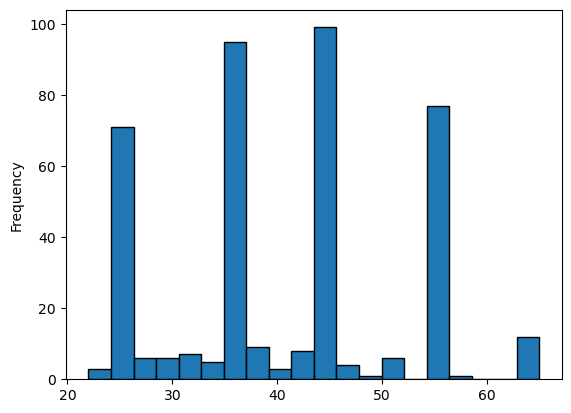

In [2566]:
print(df_normal['age'].describe())  # Основные статистики
print("Пропуски:", df_normal['age'].isna().sum())  
df_normal['age'].plot.hist(bins=20, edgecolor='black')  # Гистограмма
plt.show()

Посмотрим на выбросы с помощью графика Boxplot

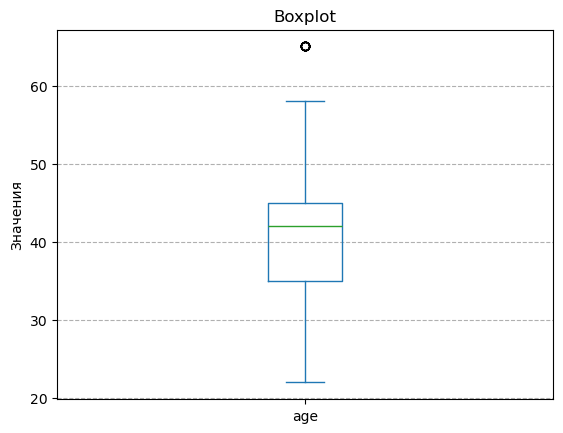

In [2567]:
df['age'].plot.box()
plt.title('Boxplot')
plt.ylabel('Значения')
plt.grid(axis='y', linestyle='--')
plt.show()

По графику видно распределение значений в диапазоне 20-60, где большинство данных сосредоточено в интервале 30-45. Для заполнения пропусков (NA/NaN) в таком случае лучше всего подойдет заполнение медианой

Выбросов так таковых нет, поэтому распределение нормальное

Почему: Распределение не выглядит строго нормальным, медиана устойчива к выбросам.

In [2568]:
df_normal['age'].fillna(df_normal['age'].median(), inplace=True)

Проверка,что все заполнилось

In [2569]:
df_normal["age"].unique()

<IntegerArray>
[22, 40, 42, 27, 46, 32, 30, 43, 51, 26, 31, 38, 34, 41, 36, 37, 48, 28, 29,
 39, 35, 25, 50, 52, 58, 23, 55, 45, 65]
Length: 29, dtype: Int64

Проверка, в каких колонках еще не заполнены пропуски

In [2570]:
print("\nПропущенные значения:")
print(df_normal.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                      0
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                         267
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                410
relative_humidity                        0
air_speed                                0
height                                 339
weight                         

Какой дф был

Какой дф стал

Процентное соотношение удаленых строк

In [2571]:
print(len(df))
print(len(df_normal))
print((len(df)-len(df_normal)) / len(df))

484
482
0.004132231404958678


In [2572]:
print("\nПропущенные значения:")
print(df_clean.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                      74
heating_method                         117
age                                      0
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                           0
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                141
relative_humidity                        0
air_speed                                0
height                                   0
weight                         

доделать заполнения над пропусками и подумать как заполнять

In [2573]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]

## Провести аналитический и графический анализ данных. Сделать выводы.

### Анализ распределения основных переменных

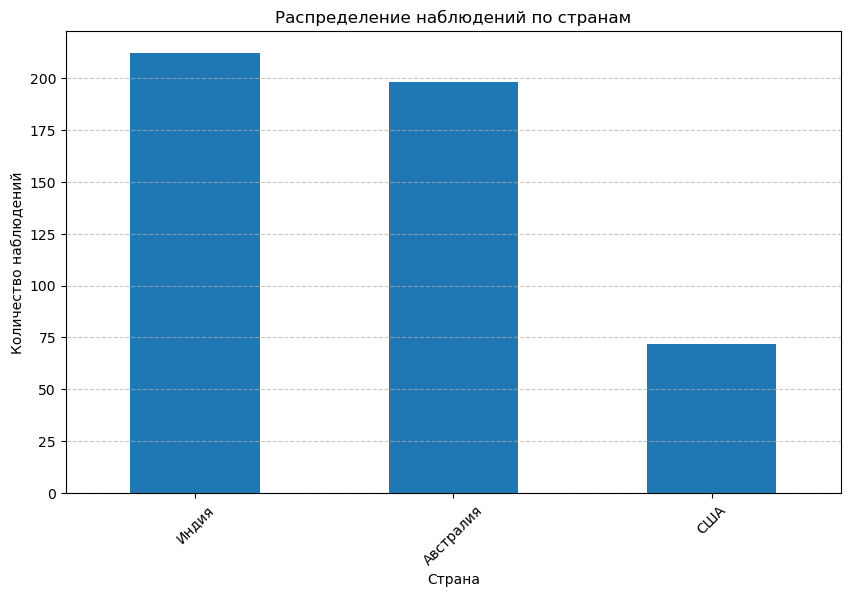

In [2574]:
# Распределение по странам
country_counts = df_normal['country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Распределение наблюдений по странам')
plt.xlabel('Страна')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наибольшее количество наблюдений из Австралии (около 200), затем Индия (около 150) и США (около 50).

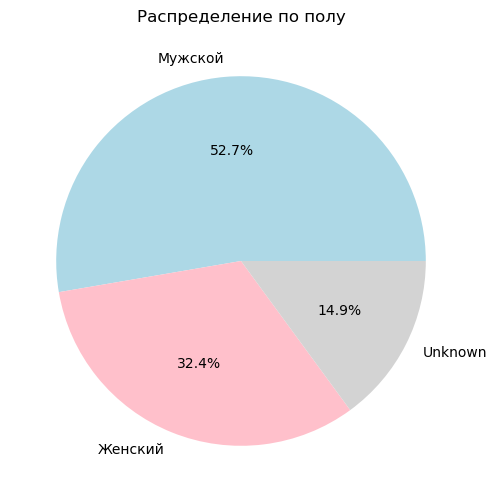

In [2575]:
# Распределение по полу
gender_counts = df_normal['gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink', 'lightgray'])
plt.title('Распределение по полу')
plt.ylabel('')
plt.show()

Вывод: В данных преобладают мужчины (около 55%), женщины составляют около 34%, и около 10% данных без указания пола.

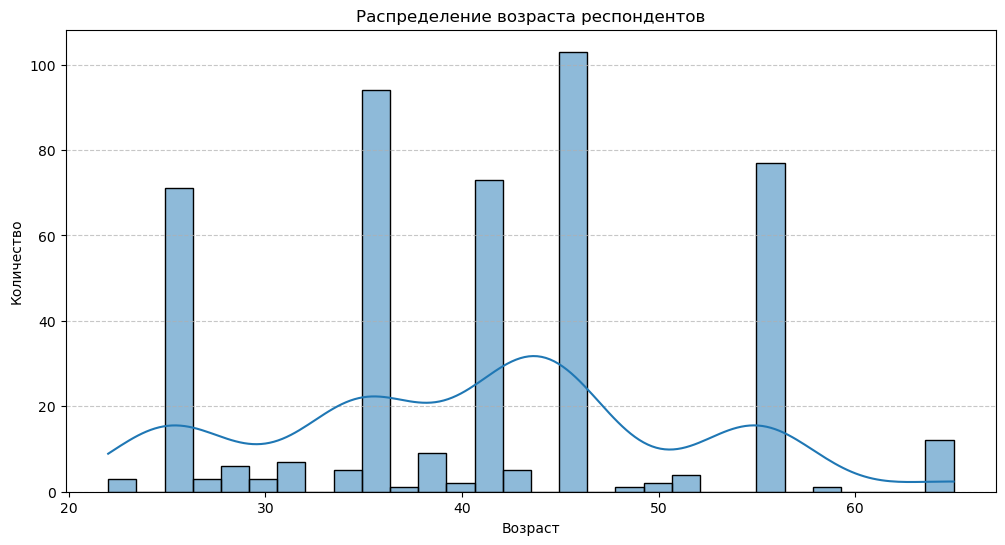

In [2576]:
# Распределение по возрасту
plt.figure(figsize=(12, 6))
sns.histplot(df_normal['age'], bins=30, kde=True)
plt.title('Распределение возраста респондентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Возрастное распределение показывает, что большинство респондентов в возрасте от 25 до 55 лет, с пиком около 35-45 лет.

### Анализ температурных значений

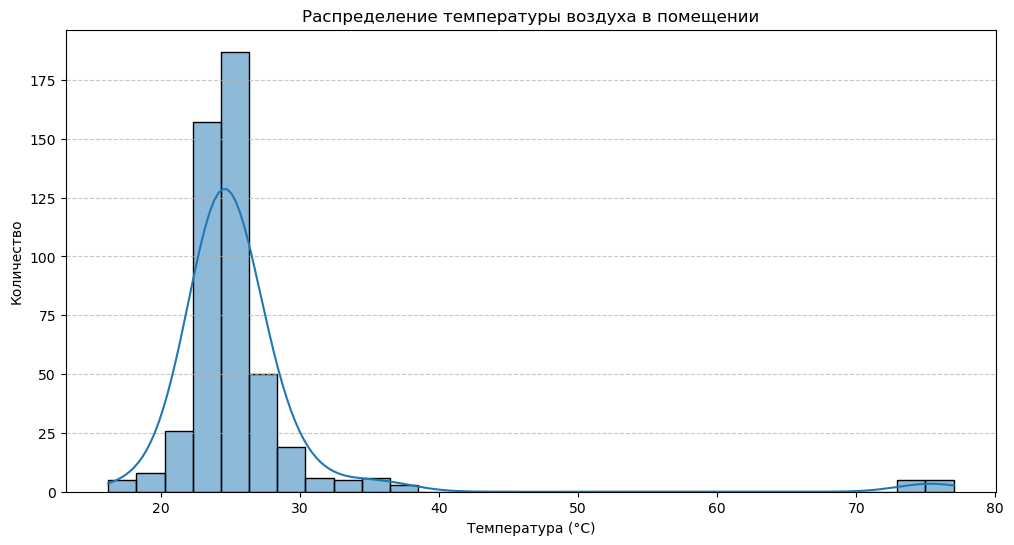

In [2577]:
# Распределение температуры в помещении
plt.figure(figsize=(12, 6))
sns.histplot(df_normal['indoor_air_temperature'], bins=30, kde=True)
plt.title('Распределение температуры воздуха в помещении')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Температура в помещении варьируется от 21°C до 29°C, с основным диапазоном 22-26°C. 

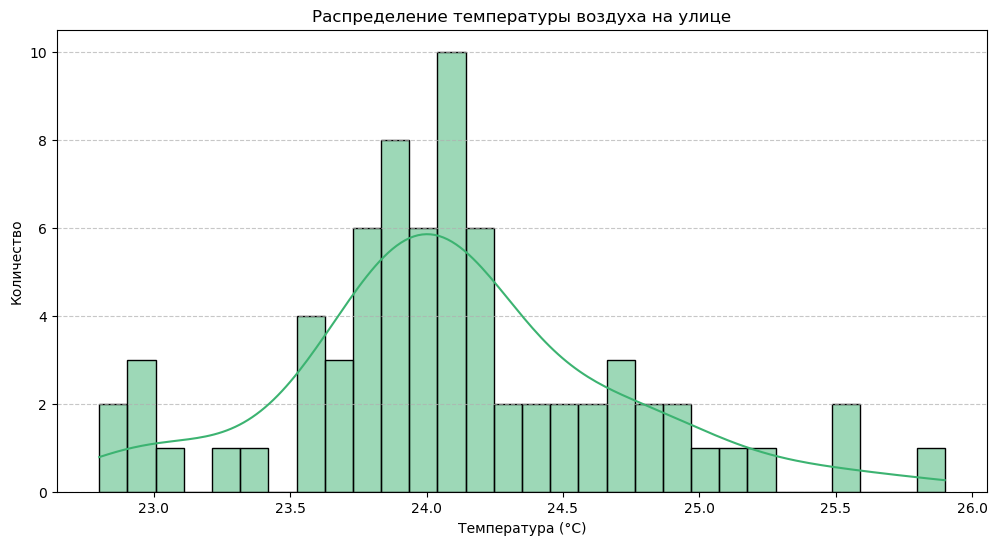

In [2578]:
# Распределение температуры на улице 
outdoor_temp = df_normal[df_normal['outdoor_air_temperature'].notna()]['outdoor_air_temperature']
plt.figure(figsize=(12, 6))
sns.histplot(outdoor_temp, bins=30, kde=True, color='mediumseagreen')
plt.title('Распределение температуры воздуха на улице')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Уличная температура варьируется от 23°C до 26°C, что отражает разные климатические условия в местах сбора данных.

## Анализ субъективных оценок

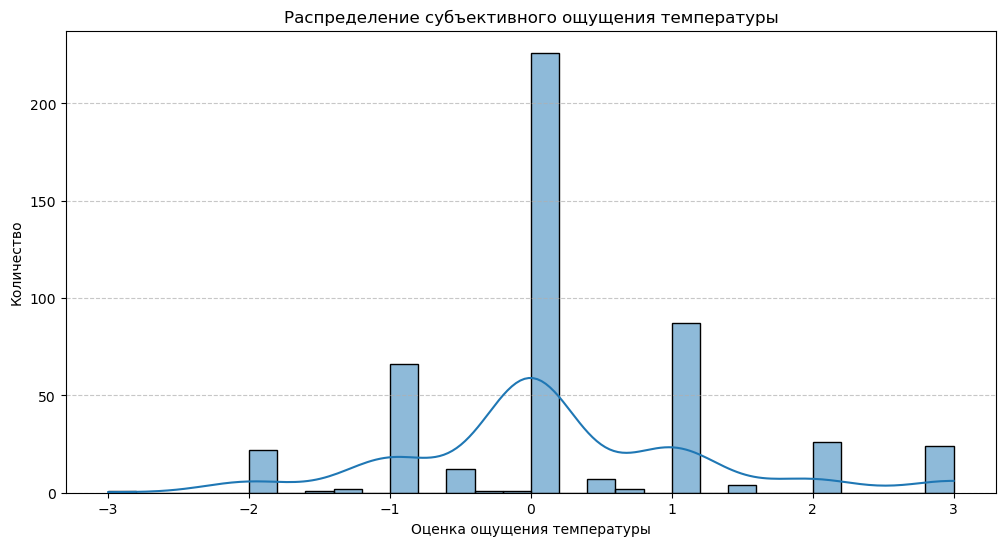

In [2579]:
# Распределение ощущения температуры
plt.figure(figsize=(12, 6))
sns.histplot(df_normal['temperature_feeling'], bins=30, kde=True)
plt.title('Распределение субъективного ощущения температуры')
plt.xlabel('Оценка ощущения температуры')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Ощущение температуры варьируется от -2 (слишком холодно) до +3 (слишком жарко), с пиком около 0 (нейтральное ощущение).

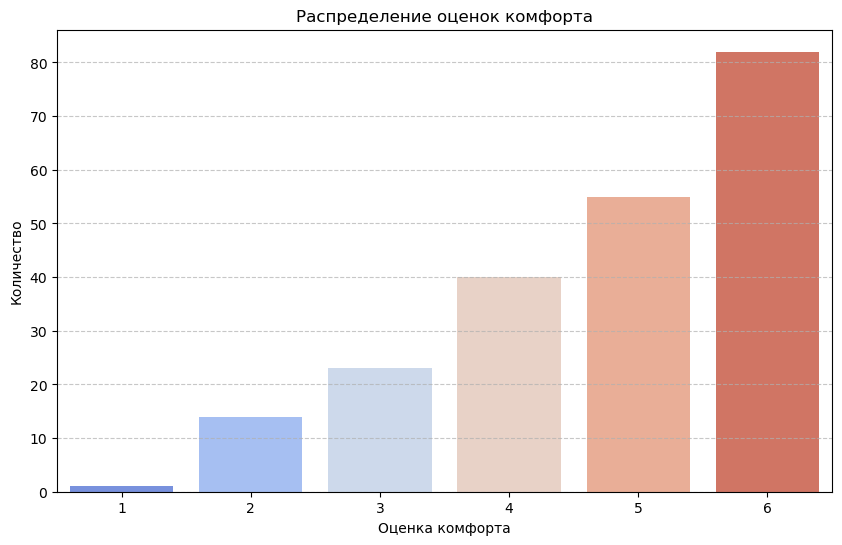

In [2580]:

# Распределение оценки комфорта
plt.figure(figsize=(10, 6))
sns.countplot(x='comfort_rating', data=df_normal, palette='coolwarm')
plt.title('Распределение оценок комфорта')
plt.xlabel('Оценка комфорта')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наиболее частые оценки комфорта - 6, остальные-по убыванию

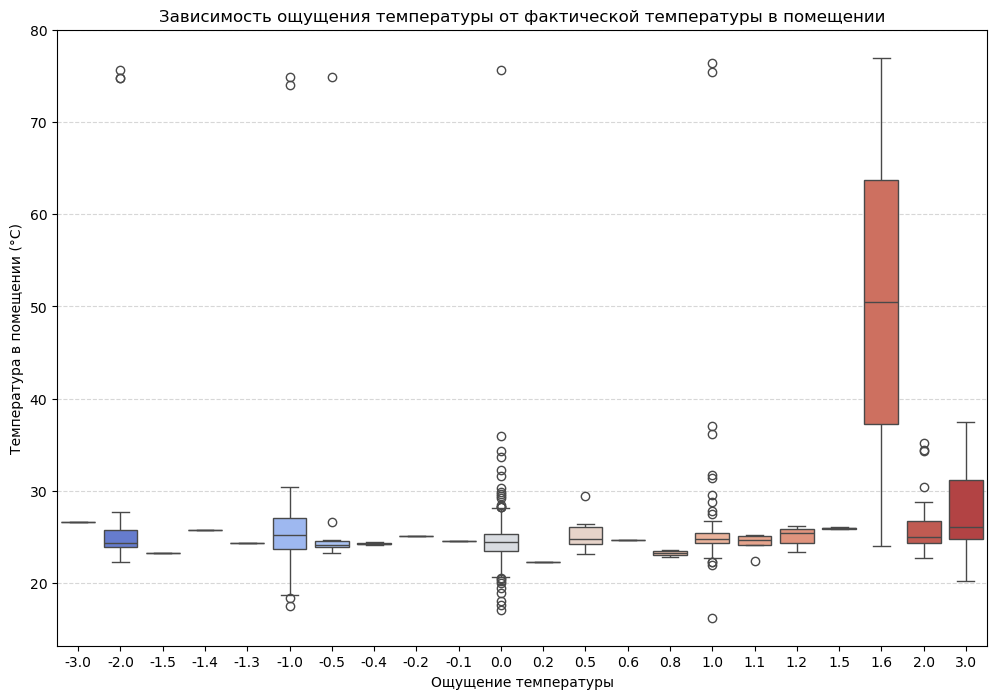

In [2581]:
# Связь температуры в помещении и ощущения температуры
plt.figure(figsize=(12, 8))
sns.boxplot(x='temperature_feeling', y='indoor_air_temperature',
            data=df_normal, palette='coolwarm')
plt.title('Зависимость ощущения температуры от фактической температуры в помещении')
plt.xlabel('Ощущение температуры')
plt.ylabel('Температура в помещении (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Анализ по климатическим зонам

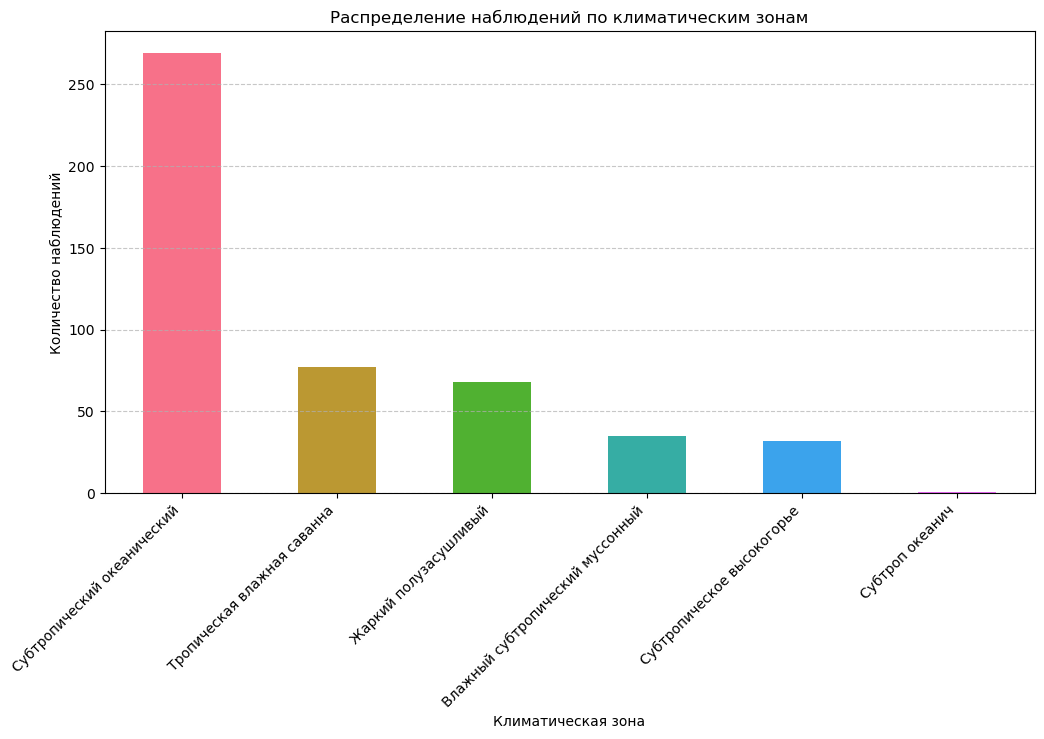

In [2582]:
# Распределение по климатическим зонам
plt.figure(figsize=(12, 6))
df_normal['climate'].value_counts().plot(kind='bar', color=sns.color_palette('husl'))
plt.title('Распределение наблюдений по климатическим зонам')
plt.xlabel('Климатическая зона')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наибольшин кол-вом представлены субтропический океанический и тропическая влажная саванна.

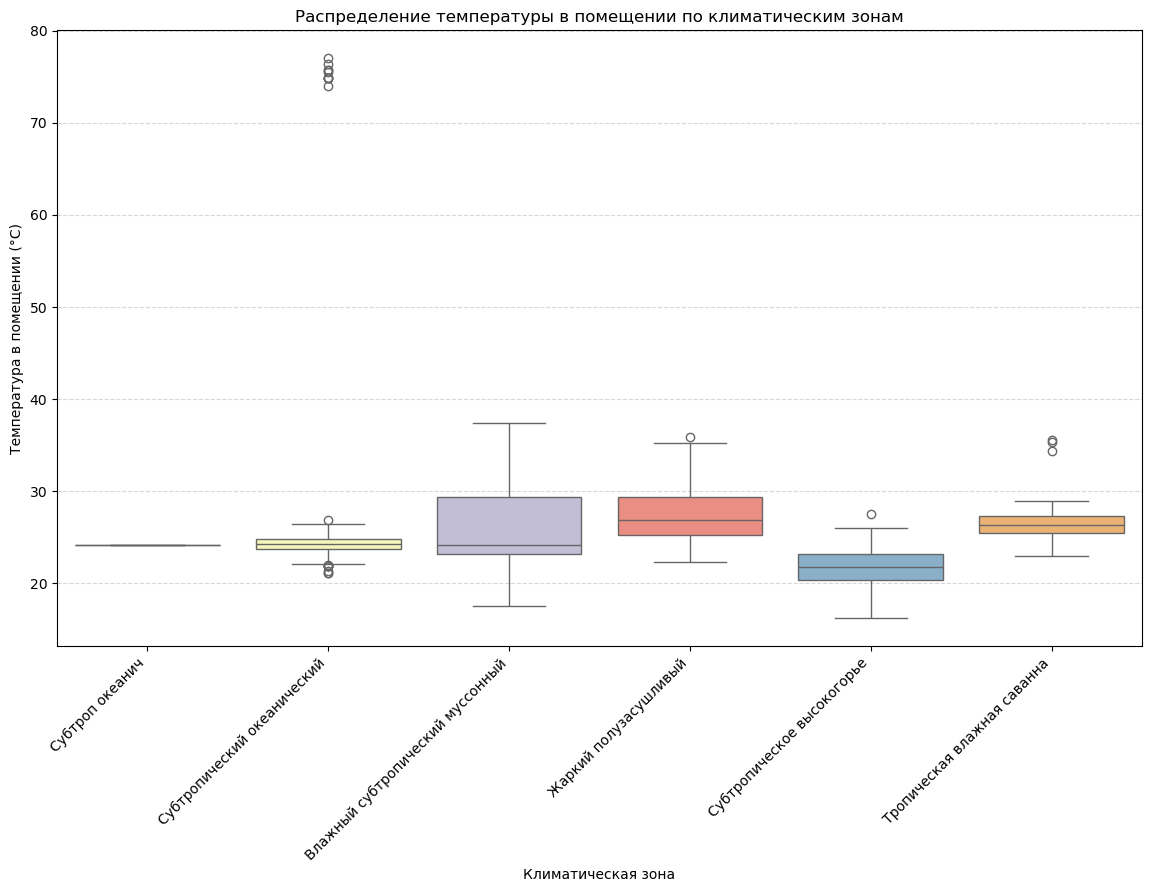

In [2583]:
# Температура в помещении по климатическим зонам
plt.figure(figsize=(14, 8))
sns.boxplot(x='climate', y='indoor_air_temperature',
            data=df_normal, palette='Set3')
plt.title('Распределение температуры в помещении по климатическим зонам')
plt.xlabel('Климатическая зона')
plt.ylabel('Температура в помещении (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Вывод: Наибольшие температуры в помещении наблюдаются в жарком полузасушливом климате, самые низкие - в субтропическом высокогорье.

### Анализ систем кондиционирования и отопления

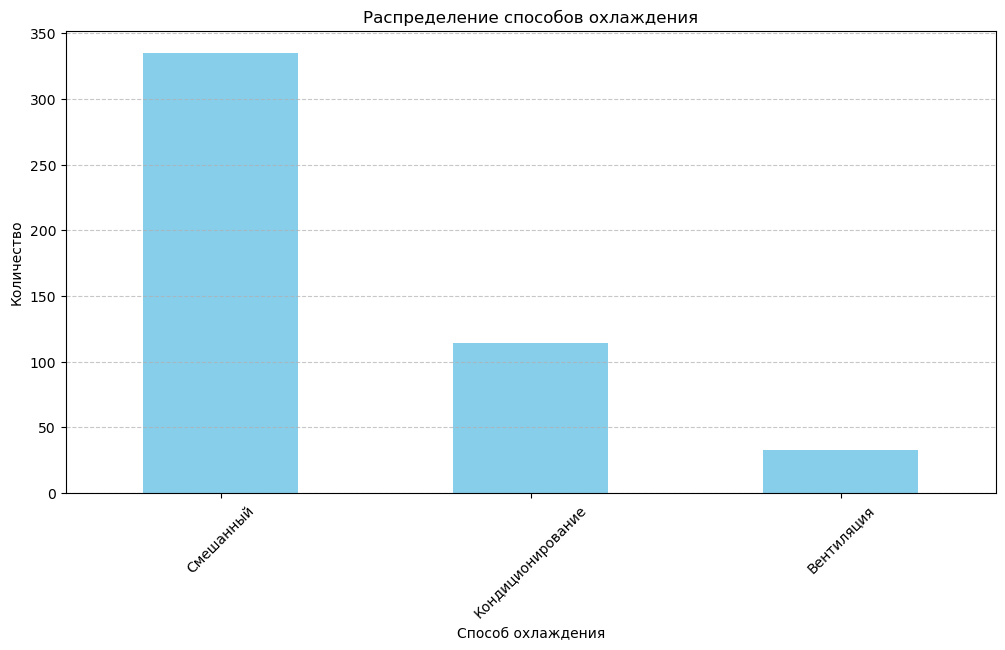

In [2584]:
# Используемые способы охлаждения
plt.figure(figsize=(12, 6))
df_normal['cooling_method'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение способов охлаждения')
plt.xlabel('Способ охлаждения')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наиболее распространены смешанные системы и кондиционирование, вентиляция используется реже.

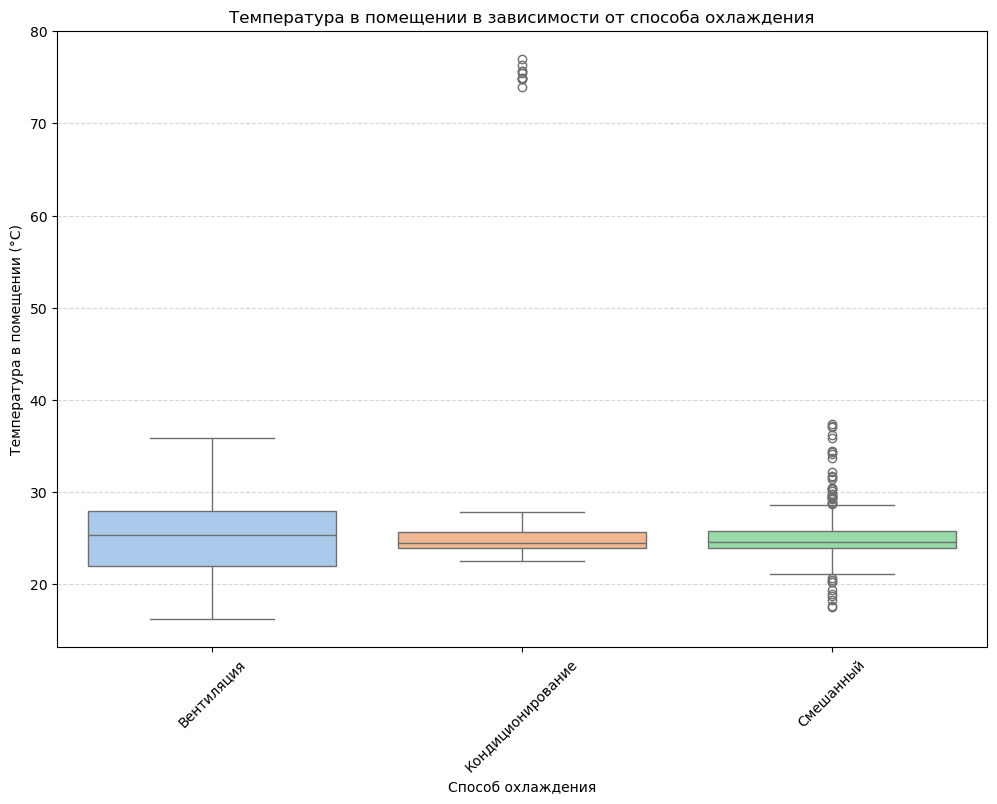

In [2585]:
# Связь способа охлаждения с температурой в помещении
plt.figure(figsize=(12, 8))
sns.boxplot(x='cooling_method', y='indoor_air_temperature',
            data=df_normal, palette='pastel')
plt.title('Температура в помещении в зависимости от способа охлаждения')
plt.xlabel('Способ охлаждения')
plt.ylabel('Температура в помещении (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Вывод: При использовании кондиционирования температура в помещении в среднем ниже, чем при вентиляции или смешанных системах.

### Многомерный анализ

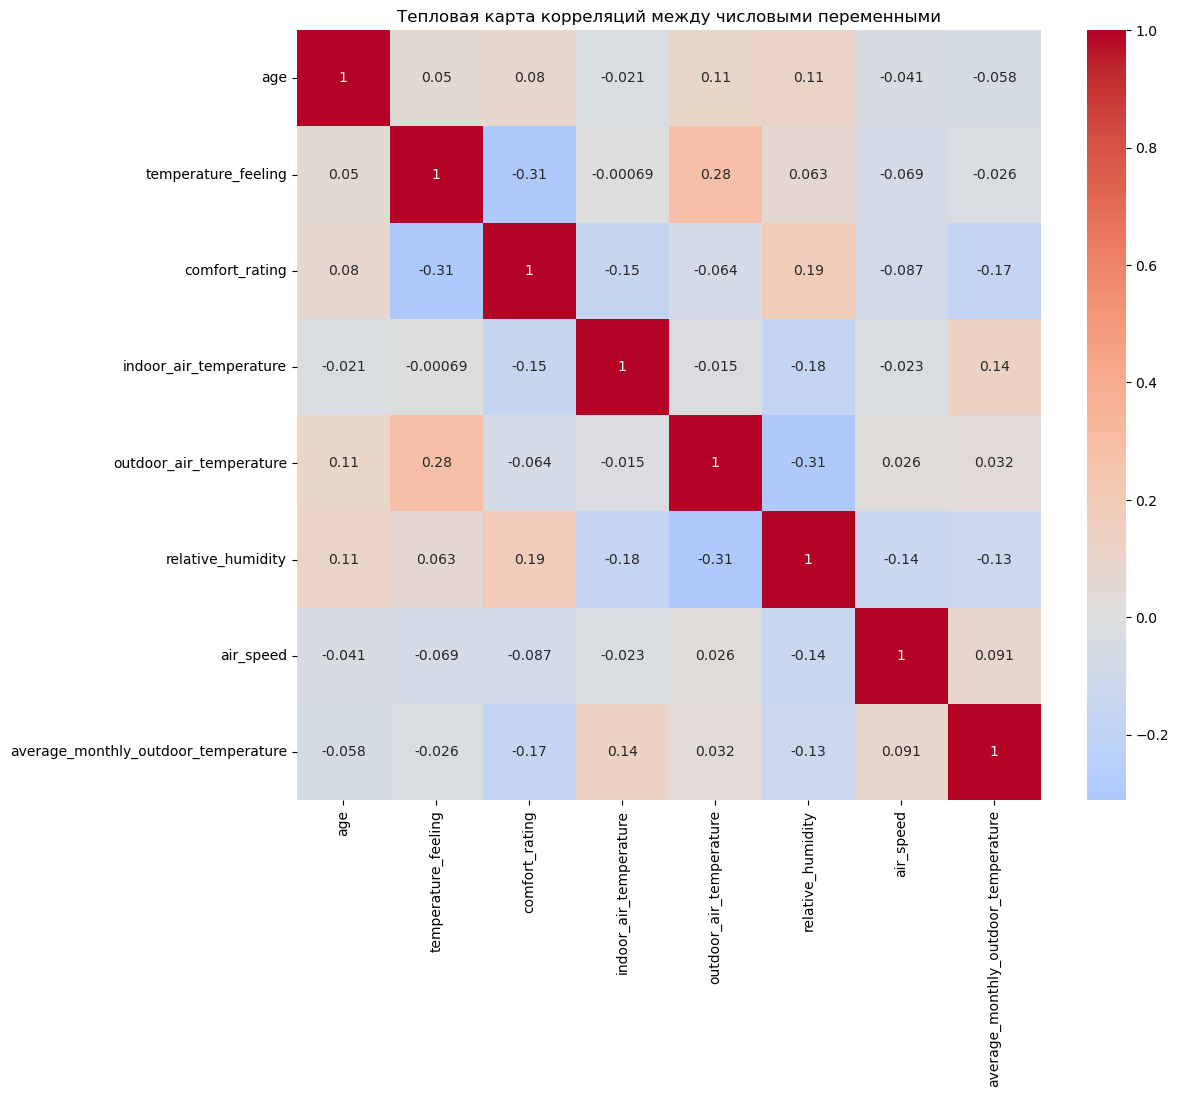

In [2586]:
# Выбор числовых переменных для корреляционного анализа
numeric_cols = [
    'age',  # Возраст
    'temperature_feeling',  # Ощущение температуры
    'comfort_rating',  # Оценка комфорта
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'average_monthly_outdoor_temperature'  # Среднемесячная температура на улице
]

# Тепловая карта корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(df_normal[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций между числовыми переменными')
plt.show()

Вывод: Наибольшая корреляция наблюдается между:

температурой в помещении и на улице

температурой в помещении и ощущением температуры

температурой на улице и средней месячной температурой

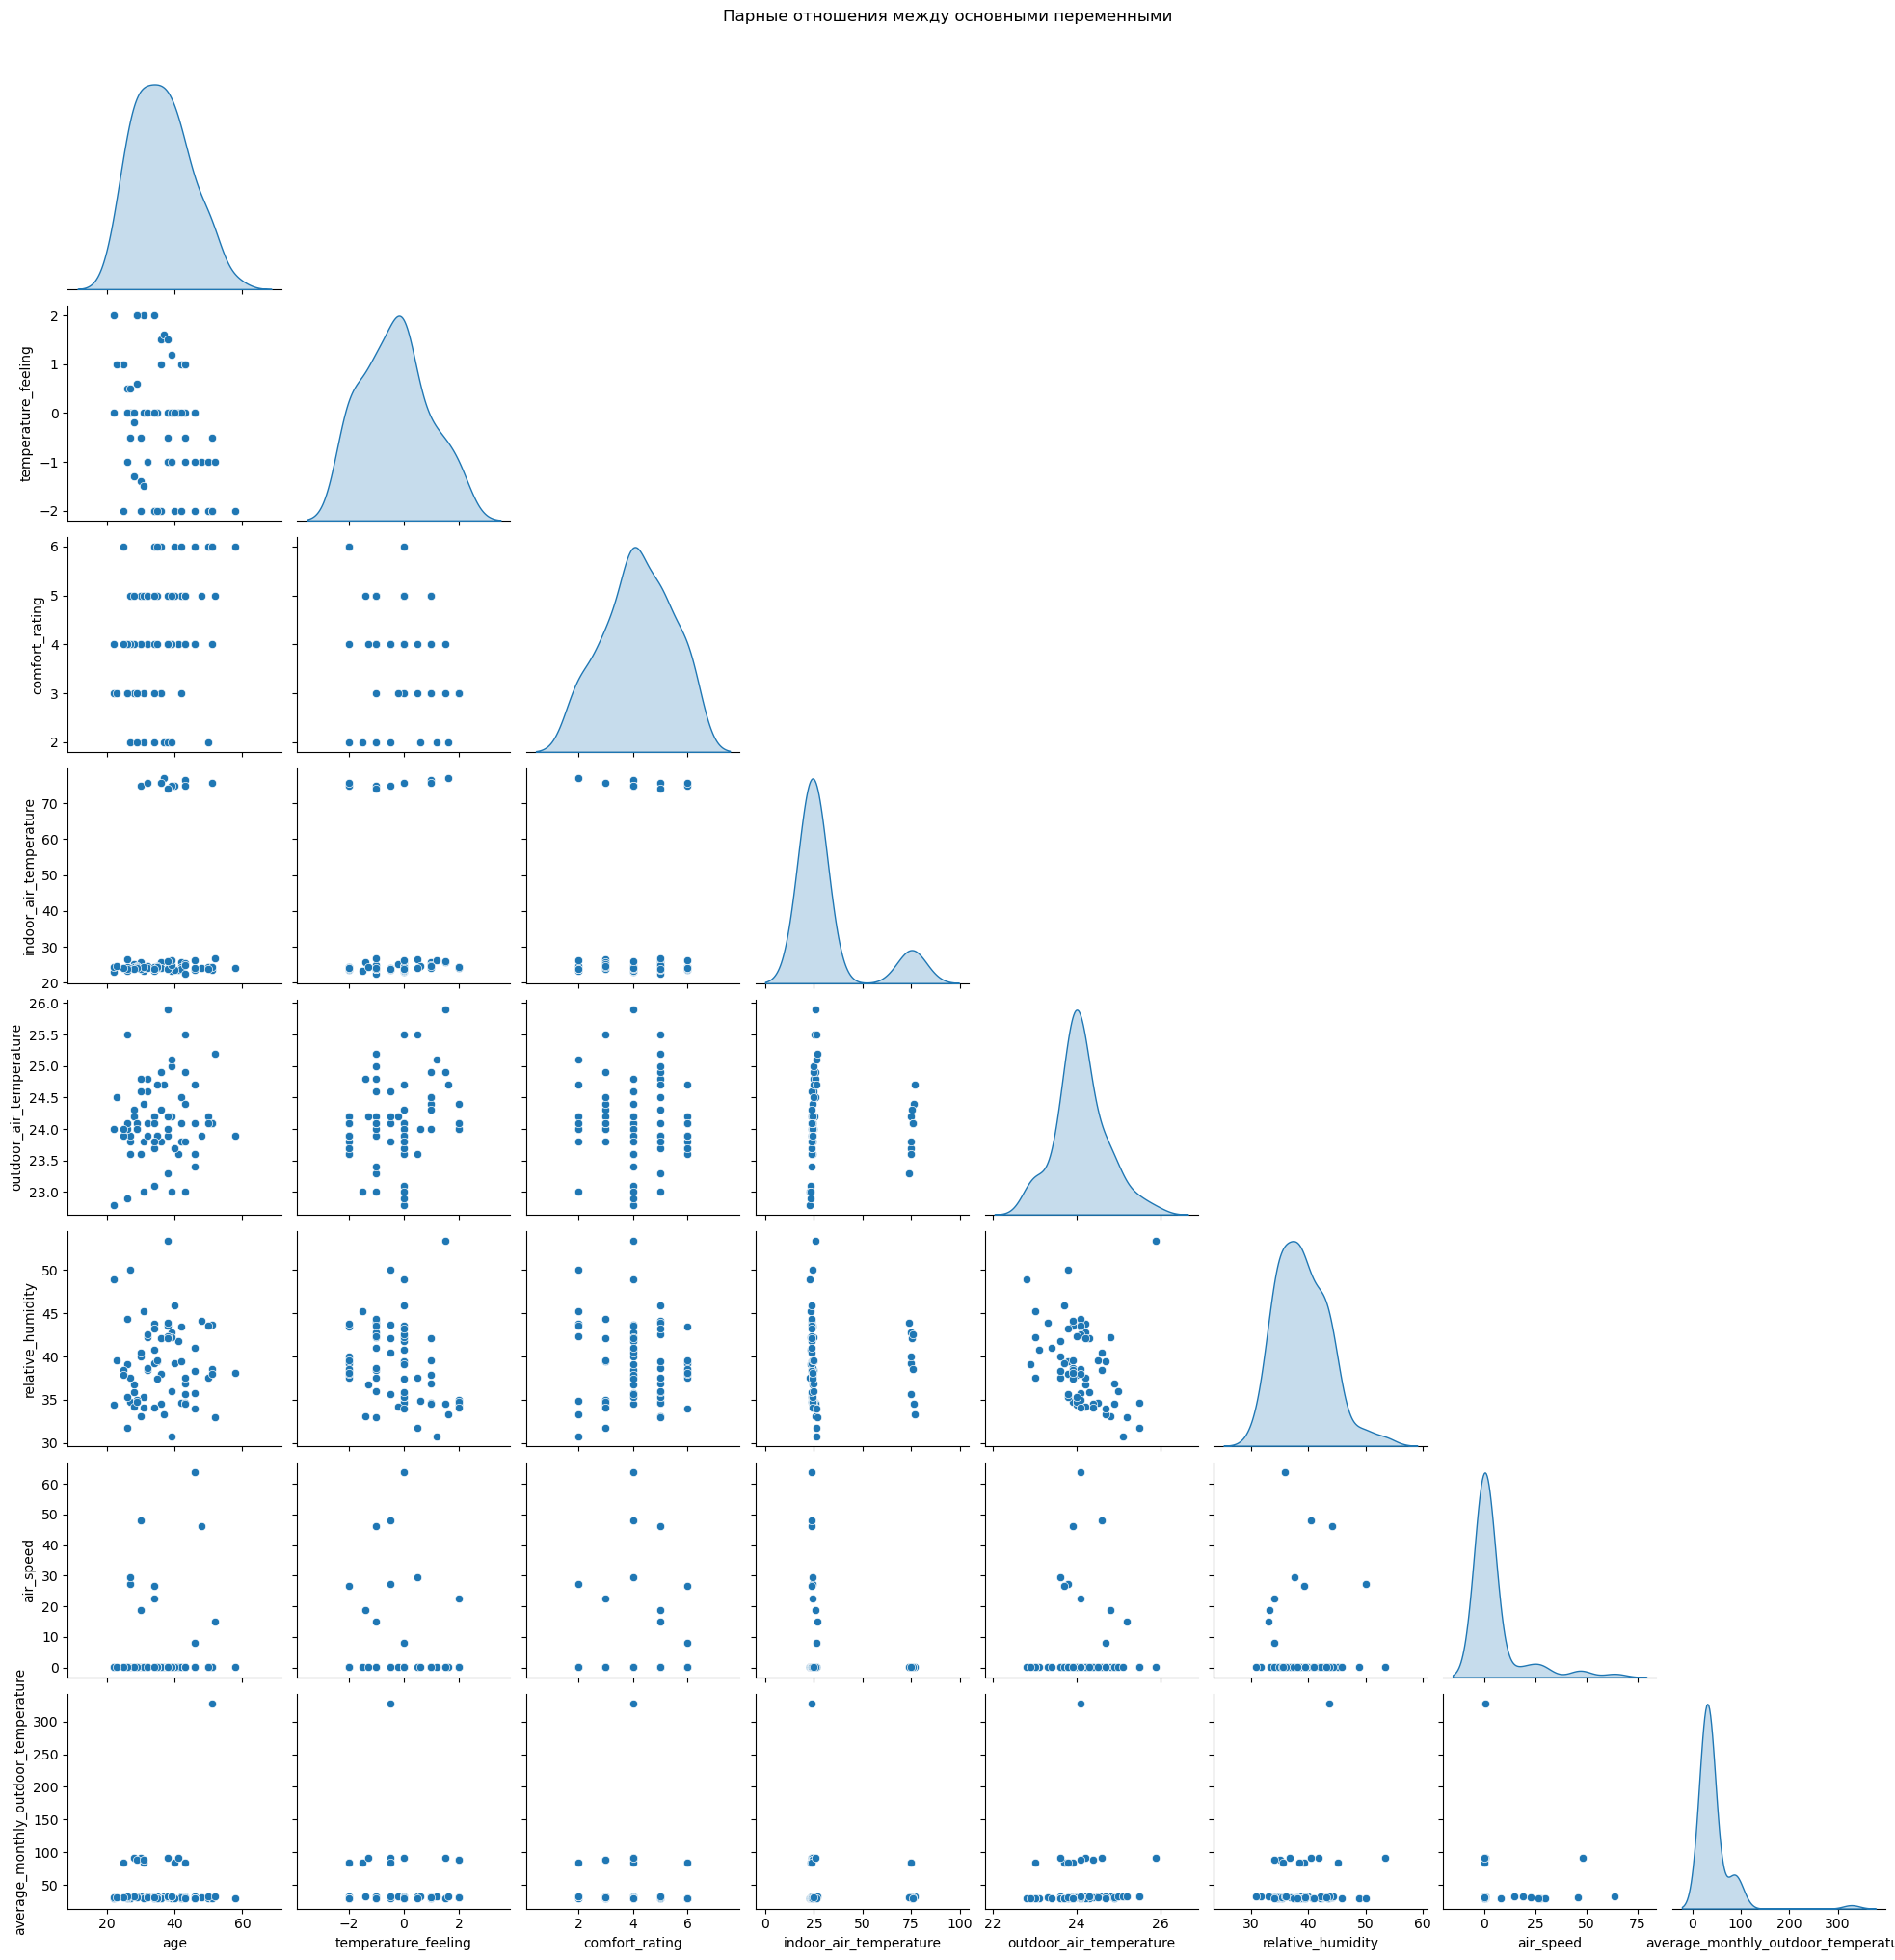

In [2587]:
# Pairplot для основных переменных
sns.pairplot(df_normal[numeric_cols].dropna(), corner=True, diag_kind='kde')
plt.suptitle('Парные отношения между основными переменными', y=1.02)
plt.show()

Вывод: Визуализация подтверждает выявленные ранее закономерности и показывает распределения и взаимосвязи между переменными.

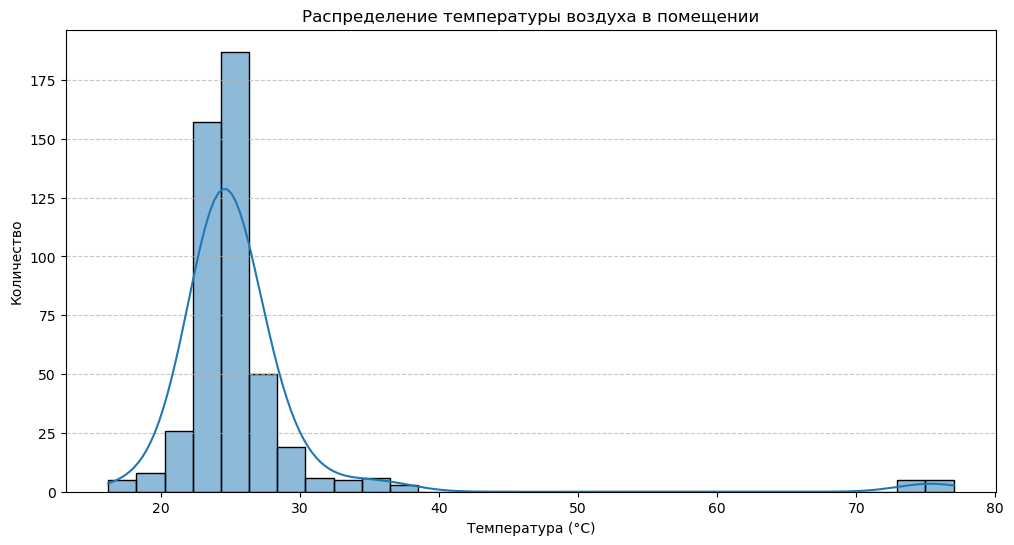

In [2588]:
# Распределение температуры в помещении
plt.figure(figsize=(12, 6))
sns.histplot(df_normal['indoor_air_temperature'], bins=30, kde=True)
plt.title('Распределение температуры воздуха в помещении')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Температура в помещении варьируется от 21°C до 29°C, с основным диапазоном 22-26°C. 

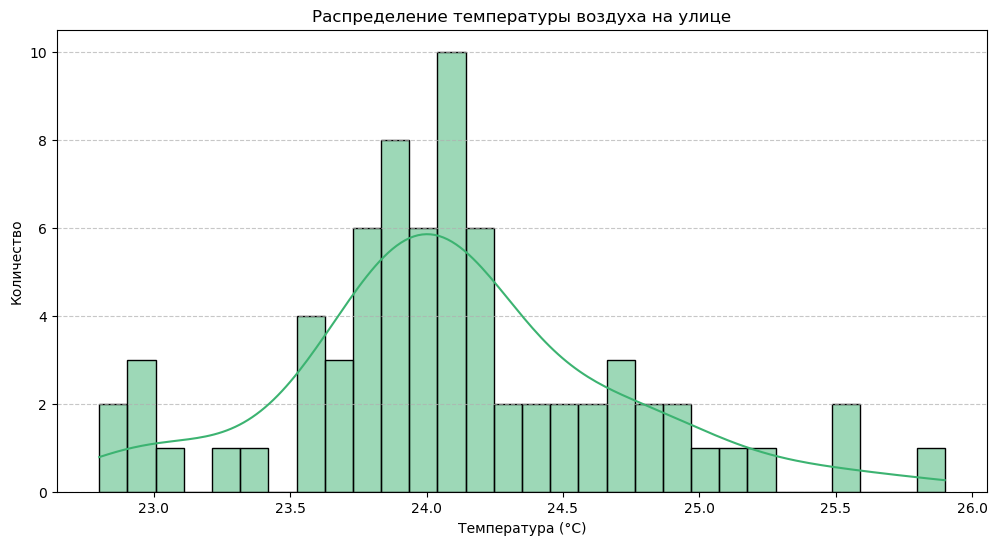

In [2589]:
# Распределение температуры на улице 
outdoor_temp = df_normal[df_normal['outdoor_air_temperature'].notna()]['outdoor_air_temperature']
plt.figure(figsize=(12, 6))
sns.histplot(outdoor_temp, bins=30, kde=True, color='mediumseagreen')
plt.title('Распределение температуры воздуха на улице')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Уличная температура варьируется от 23°C до 26°C, что отражает разные климатические условия в местах сбора данных.